## Proton proton collision with the randomized production of Higgs Boson Simulation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [5]:
num_partons = 6
def init():
    proton1.set_data([], [])
    proton2.set_data([], [])
    partons.set_data([], [])
    higgs.set_data([], [])
    return proton1, proton2, partons, higgs

In [9]:
def update(current_frame):
    # Initial protons
    proton1.set_data(current_frame, 0)
    proton2.set_data(-current_frame, 0)

    # Looking for collision point
    if abs(current_frame) < 0.5:
        collision_x = 0

        # Protons transform into 3 partons each, sets data to empty
        proton1.set_data([], [])
        proton2.set_data([], [])
        
        # Initial positions for partons in the middle
        parton_positions_x = np.full(num_partons, collision_x)
        parton_positions_y = np.zeros(num_partons)
        partons.set_data(parton_positions_x, parton_positions_y)

        # Randomly create higgs boson! 10% probability
        if np.random.rand() < 0.1:
            higgs.set_data(collision_x, 0)
        else:
            higgs.set_data([], [])

    else:
        # Partons do random walk with Monte Carlo-like decision
        existing_data = partons.get_data()
        if len(existing_data[0]) > 0:
            # Increase the magnitude of random movements for faster spreading
            new_positions_x = existing_data[0] + 0.01 * np.random.randn(num_partons)
            new_positions_y = existing_data[1] + 0.01 * np.random.randn(num_partons)
            
            # Monte Carlo-like decision for each parton's movement
            for i in range(num_partons):
                r = np.random.rand()
                if r < 0.25:  # Move to the right
                    new_positions_x[i] += 0.03
                elif 0.25 <= r < 0.5:  # Move to the left
                    new_positions_x[i] -= 0.03
                elif 0.5 <= r < 0.75:  # Move upward
                    new_positions_y[i] += 0.03
                else:  # Move downward
                    new_positions_y[i] -= 0.03
            
            partons.set_data(new_positions_x, new_positions_y)

            # Protons disappear with interaction because now just partons and higgs?
            proton1.set_data([], [])
            proton2.set_data([], [])

            # Higgs disappears after appearing
            higgs.set_data([], [])

    return proton1, proton2, partons, higgs

/var/folders/t_/k8ycvsq56jj70rqtjvnbfjfc0000gn/T/ipykernel_23221/2966038367.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  partons, = ax.plot([], [], 'ro', markersize=3, linestyle='None', marker='o')
/var/folders/t_/k8ycvsq56jj70rqtjvnbfjfc0000gn/T/ipykernel_23221/1206222676.py:3: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  proton1.set_data(current_frame, 0)
/var/folders/t_/k8ycvsq56jj70rqtjvnbfjfc0000gn/T/ipykernel_23221/1206222676.py:4: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  proton2.set_data(-current_frame, 0)
/var/folders/t_/k8ycvsq56jj70rqtjvnbfjfc0000gn/T/ipykernel_23221/1206222676.py:21: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated sin

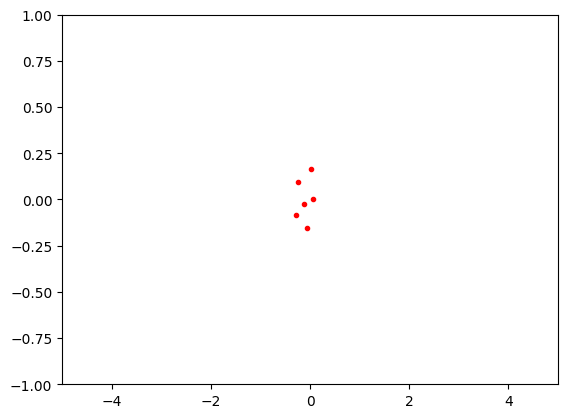

In [10]:
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-1, 1)

proton1, = ax.plot([], [], 'bo', markersize=10)
proton2, = ax.plot([], [], 'bo', markersize=10)
partons, = ax.plot([], [], 'ro', markersize=3, linestyle='None', marker='o')
higgs, = ax.plot([], [], 'go', markersize=6)

animation = FuncAnimation(fig, update, frames=np.arange(-5, 5, 0.1),
                          init_func=init, blit=True)
animation.save('simulation2.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
#saved simulation1.mp4 to show higgs vs no higgs generation
plt.show()

## Production of the jets during proton-proton collisions

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import TABLEAU_COLORS

In [23]:
np.random.seed(42)

In [24]:
# Initial conditions
proton_energy = 6.5e12  # Energy of each proton in eV
collision_energy = 2 * proton_energy  # Center-of-mass energy
higgs_production_probability = 0.01  # Probability of Higgs production (adjust as needed)

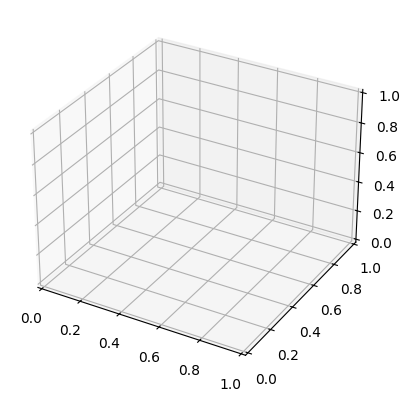

In [25]:
num_events = 50

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [45]:
particles_x = []
particles_y = []
particles_z = []
colors = []

In [46]:
def parton_distribution_function(x, Q):
    A, B, C = 1, 2, 3  
    return A * x**B * (1 - x)**C #would set to more complex pdfs but i simplified

In [52]:
def generate_parton_momenta():
    # generate random parton momenta based on PDFs
    x1 = np.random.rand()
    x2 = np.random.rand()
    parton1_momentum = proton_energy * x1
    parton2_momentum = proton_energy * x2
    return parton1_momentum, parton2_momentum

In [53]:
def hard_scattering(parton1_momentum, parton2_momentum):
    quark1_momentum = parton1_momentum * np.random.uniform(0.1, 0.9)
    quark2_momentum = parton2_momentum * np.random.uniform(0.1, 0.9)
    return quark1_momentum, quark2_momentum

In [54]:
def fragmentation_and_hadronization(quark_momentum):
    jet_particles = simulate_jet(quark_momentum)
    return jet_particles

In [55]:
def simulate_jet(quark_momentum):
    num_particles = np.random.randint(5, 15)  # random number of particles in each jet
    jet_particles = np.random.rand(num_particles, 3)
    return jet_particles

In [56]:
def simulate_event(frame):
    ax.clear()

    parton1_momentum, parton2_momentum = generate_parton_momenta()
    quark1_momentum, quark2_momentum = hard_scattering(parton1_momentum, parton2_momentum)
    jet1_particles = fragmentation_and_hadronization(quark1_momentum)
    jet2_particles = fragmentation_and_hadronization(quark2_momentum)

    particles_x.extend(jet1_particles[:, 0])
    particles_y.extend(jet1_particles[:, 1])
    particles_z.extend(jet1_particles[:, 2])
    colors.extend([TABLEAU_COLORS['tab:blue']] * len(jet1_particles))

    particles_x.extend(jet2_particles[:, 0])
    particles_y.extend(jet2_particles[:, 1])
    particles_z.extend(jet2_particles[:, 2])
    colors.extend([TABLEAU_COLORS['tab:orange']] * len(jet2_particles))

    ax.scatter(particles_x, particles_y, particles_z, c=colors)

ani = animation.FuncAnimation(fig, simulate_event, frames=num_events, interval=500, repeat=False)
ani.save('simulation3.mp4', writer='ffmpeg', fps=2)
plt.show()